In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import random
import os
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

work_dir = 'Iyer_etal_2020_SFH_data/'
extn = '_sfhs_psds.mat'

simulation_names = ['Eagle', 'Illustris', 'IllustrisTNG', 'Mufasa', 'Simba', 'SC-Sam', 'UniverseMachine', 'Fire-2', 'Marvel_JL']
combined = []
for sim_name in simulation_names:
    sim_data = sio.loadmat(work_dir + sim_name + extn)
    sfhs = sim_data['smallsfhs'].T[:, :136] # Only getting the first 136 timesteps rn, might change later
    presentsfr = sfhs[:, -1]  # Accessing the last time step for redshift 0 sfr
    logmass = np.array(sim_data['logmass'].ravel())
    combined = combined + [[arr, m, s] for arr, m, s in zip(sfhs, logmass, presentsfr)] # List containing all galaxies from the simulation,
# each is represented as a list of 3 elements: the np array containing its full sfhs, a log stellar mass, and its present SFR

In [3]:
labels = [0] * len(combined) # Initializing an empty array to store labels
for i in range(len(combined)):
    if combined[i][1] > math.log10(6.08e10 - 3 * 1.14e10) and combined[i][1] < math.log10(6.08e10 + 3 * 1.14e10) and  combined[i][2] > 1.65 - 3*0.19 and combined[i][2] < 1.65 + 3*0.19:
        labels[i] = 1
        
    else:
        labels[i] = 0
print(len([label for label in labels if label == 1])/len(combined))
print(len(combined))

0.009149966172056148
152241


In [40]:
sfhs = np.array([galaxy[0] for galaxy in combined])
sfhs.shape

(152241, 136)

NameError: name 'sfhs' is not defined

In [42]:
X_train, X_test, y_train, y_test = train_test_split(sfhs, labels, test_size=0.2, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(2, 10), (6, 10), (10, 10)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [1e-4, 0.01, 0.1],
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=50, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best cross-validated score
best_cv_score = grid_search.best_score_
print("Best cross-validated score: ", best_cv_score)

# Best parameters found
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Score on the test set
test_score = grid_search.score(X_test, y_test)
print("Test score: ", test_score)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (

Best cross-validated score:  0.9908122044128443
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (2, 10), 'learning_rate_init': 0.0001}
Test score:  0.9910013465138429


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
[[30175     0]
 [  274     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30175
           1       0.00      0.00      0.00       274

    accuracy                           0.99     30449
   macro avg       0.50      0.50      0.50     30449
weighted avg       0.98      0.99      0.99     30449

ROC-AUC Score:
0.9507757061907728


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

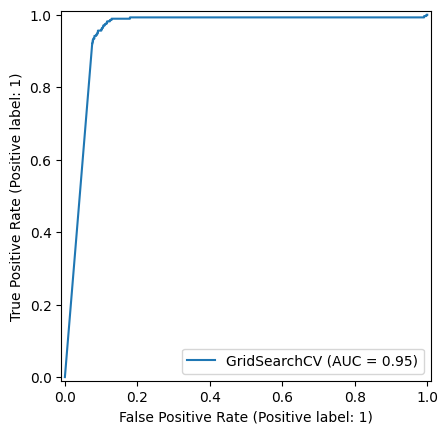

[CV] END activation=relu, hidden_layer_sizes=(2, 10), learning_rate_init=0.0001; total time=   6.1s
[CV] END activation=relu, hidden_layer_sizes=(6, 10), learning_rate_init=0.01; total time=   6.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), learning_rate_init=0.1; total time=   3.2s
[CV] END activation=tanh, hidden_layer_sizes=(2, 10), learning_rate_init=0.0001; total time=   5.5s
[CV] END activation=tanh, hidden_layer_sizes=(6, 10), learning_rate_init=0.01; total time=   6.6s
[CV] END activation=tanh, hidden_layer_sizes=(10, 10), learning_rate_init=0.1; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(2, 10), learning_rate_init=0.01; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(6, 10), learning_rate_init=0.0001; total time=   6.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), learning_rate_init=0.01; total time=   4.8s
[CV] END activation=tanh, hidden_layer_sizes=(2, 10), learning_rate_init=0.01; total time=   2.3s
[CV] END acti

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Assuming y_test are the true labels and y_pred are the predicted labels
y_pred = grid_search.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# ROC-AUC
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:")
print(roc_auc)

# ROC Curve
RocCurveDisplay.from_estimator(grid_search, X_test, y_test)

In [35]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

In [36]:
clf = MLPClassifier(max_iter=100, random_state=42)

search_spaces = {
    'hidden_layer_sizes': Categorical([(50,), (100,), (200,), (50, 50), (100, 100)]),
    'activation': Categorical(['tanh', 'relu']),
    'learning_rate': Categorical(['constant', 'adaptive']),
    'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform')
}

# Define custom scoring functions
scoring = {
    'F1': make_scorer(f1_score),
    'ROC_AUC': make_scorer(roc_auc_score, needs_proba=True)
}

# Initialize BayesSearchCV with the corrected parameters
opt = BayesSearchCV(estimator=clf, search_spaces=search_spaces, n_iter=5, cv=3, n_jobs=-1, verbose=3, scoring=scoring, refit='ROC_AUC')

# Fit the optimizer
opt.fit(X_train, y_train)

# Best hyperparameters found
print("Best hyperparameters found: ", opt.best_params_)

# Evaluate on the test set
test_score = opt.score(X_test, y_test)
print("Test score: ", test_score)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: Not all points are within the bounds of the space.

In [ ]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_, " Best score: ", grid_search.best_score_)

# Evaluate on the test set
print("Test set score: ", grid_search.score(X_test, y_test))

In [ ]:
# clf.fit(X_train, y_train)

# # Lists to store training and validation loss
# training_loss = []
# validation_loss = []

# # Train the model iteratively
# for i in range(300):  # Adjust the range for the number of iterations you want
#     clf.fit(X_train, y_train)
    
#     # Predict probabilities for calculating log loss
#     train_prob = clf.predict_proba(X_train)
#     test_prob = clf.predict_proba(X_test)
    
#     # Calculate log loss for training and validation sets
#     train_loss = log_loss(y_train, train_prob)
#     val_loss = log_loss(y_test, test_prob)
    
#     # Store the losses
#     training_loss.append(train_loss)
#     validation_loss.append(val_loss)

# # Plot the training curve
# plt.figure(figsize=(10, 6))
# plt.plot(training_loss, label='Training Loss')
# plt.plot(validation_loss, label='Validation Loss')
# plt.xlabel('Iteration')
# plt.ylabel('Log Loss')
# plt.title('Training Curve')
# plt.legend()
# plt.show()

In [ ]:
predictions = clf.predict(X_test)
error = abs(len([pred for pred in predictions if pred == 1]) - len([real for real in y_test if real == 1]))/len([real for real in y_test if real == 1])
print(f'Total error is {error}')

In [ ]:
test_MWAs_sfhs = []
for i in range(len(X_test)):
    if y_test[i] == 1:
        test_MWAs_sfhs.append(X_test[i])
# clf.predict_proba(X_test)

In [ ]:
probs = []
for MWA in test_MWAs_sfhs:
    probs.append(clf.predict_proba([MWA]))
no_prob = []
yes_prob = []
for prob in probs:
    no_prob.append(prob[0,0])
    yes_prob.append(prob[0,1])
print(f'MWAs: \n Average predicted probability for non-MWA: {sum(no_prob)/len(no_prob)}\n Average predicted probability for MWA: {sum(yes_prob)/len(yes_prob)}')

In [ ]:
test_non_MWAs_sfhs = []
for i in range(len(X_test)):
    if y_test[i] == 0:
        test_non_MWAs_sfhs.append(X_test[i])
probs2 = []
for non_MWA in test_non_MWAs_sfhs:
    probs2.append(clf.predict_proba([non_MWA]))
no_prob2 = []
yes_prob2 = []
for prob in probs2:
    no_prob2.append(prob[0,0])
    yes_prob2.append(prob[0,1])
print(f'Non-MWAs: \n Average predicted probability for non-MWA: {sum(no_prob2)/len(no_prob2)}\n Average predicted probability for MWA: {sum(yes_prob2)/len(yes_prob2)}')

In [ ]:
def load_simulation_data(sim_name: str):
    sim_data = sio.loadmat(work_dir + sim_name + extn)
    sfhs = sim_data['smallsfhs']
    logmass = sim_data['logmass'].ravel()
    presentsfr = sfhs[135]  # Accessing the last time step for redshift 0 sfr
    combined = np.column_stack((sfhs, logmass))
    return combined

all_galaxies = load_simulation_data('Eagle')

for i in all_galaxies:
    print(i)

# Random classification? Benchmarking expectations for bad models -- is it doing better than the baseline?
# Look at metrics like accuracy and confusion, create loss curves, see if improvement in the model makes sense
# Don't let it just predict the mean, experiment with learning rates/architecture
# PyTorch

# Grid search and random search are confusing and starting points are arbitrary. I'm gonna experiment with Bayesian hyperparameter optimization!
#TODO: try to debug skopt issue